In [2]:
#Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



import os
for dirname, _, filenames in os.walk('C:\\Users\\kwjin\\Desktop\\kwdoc\\대학원 수업\\2021-1학기\\데이터마이닝\\archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\kwjin\Desktop\kwdoc\대학원 수업\2021-1학기\데이터마이닝\archive\heart.csv
C:\Users\kwjin\Desktop\kwdoc\대학원 수업\2021-1학기\데이터마이닝\archive\o2Saturation.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## load data

In [5]:
heart=pd.read_csv('C:\\Users\\kwjin\\Desktop\\kwdoc\\대학원 수업\\2021-1학기\\데이터마이닝\\archive/heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
## null remove, duplicate remove

In [8]:
print(heart.isnull())
heart.info()
heart.duplicated()
heart[heart.duplicated()]
heart.drop_duplicates(keep='first',inplace=True)

       age    sex     cp  trtbps   chol    fbs  restecg  thalachh   exng  \
0    False  False  False   False  False  False    False     False  False   
1    False  False  False   False  False  False    False     False  False   
2    False  False  False   False  False  False    False     False  False   
3    False  False  False   False  False  False    False     False  False   
4    False  False  False   False  False  False    False     False  False   
..     ...    ...    ...     ...    ...    ...      ...       ...    ...   
298  False  False  False   False  False  False    False     False  False   
299  False  False  False   False  False  False    False     False  False   
300  False  False  False   False  False  False    False     False  False   
301  False  False  False   False  False  False    False     False  False   
302  False  False  False   False  False  False    False     False  False   

     oldpeak    slp    caa  thall  output  
0      False  False  False  False   False  

In [ ]:
## IQR 이상치 탐지

In [14]:
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=heart[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(heart)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.305%
Column chol outliers = 5 => 1.656%
Column thalachh outliers = 1 => 0.331%
Column oldpeak outliers = 8 => 2.649%


In [15]:
## 이상치 시각화

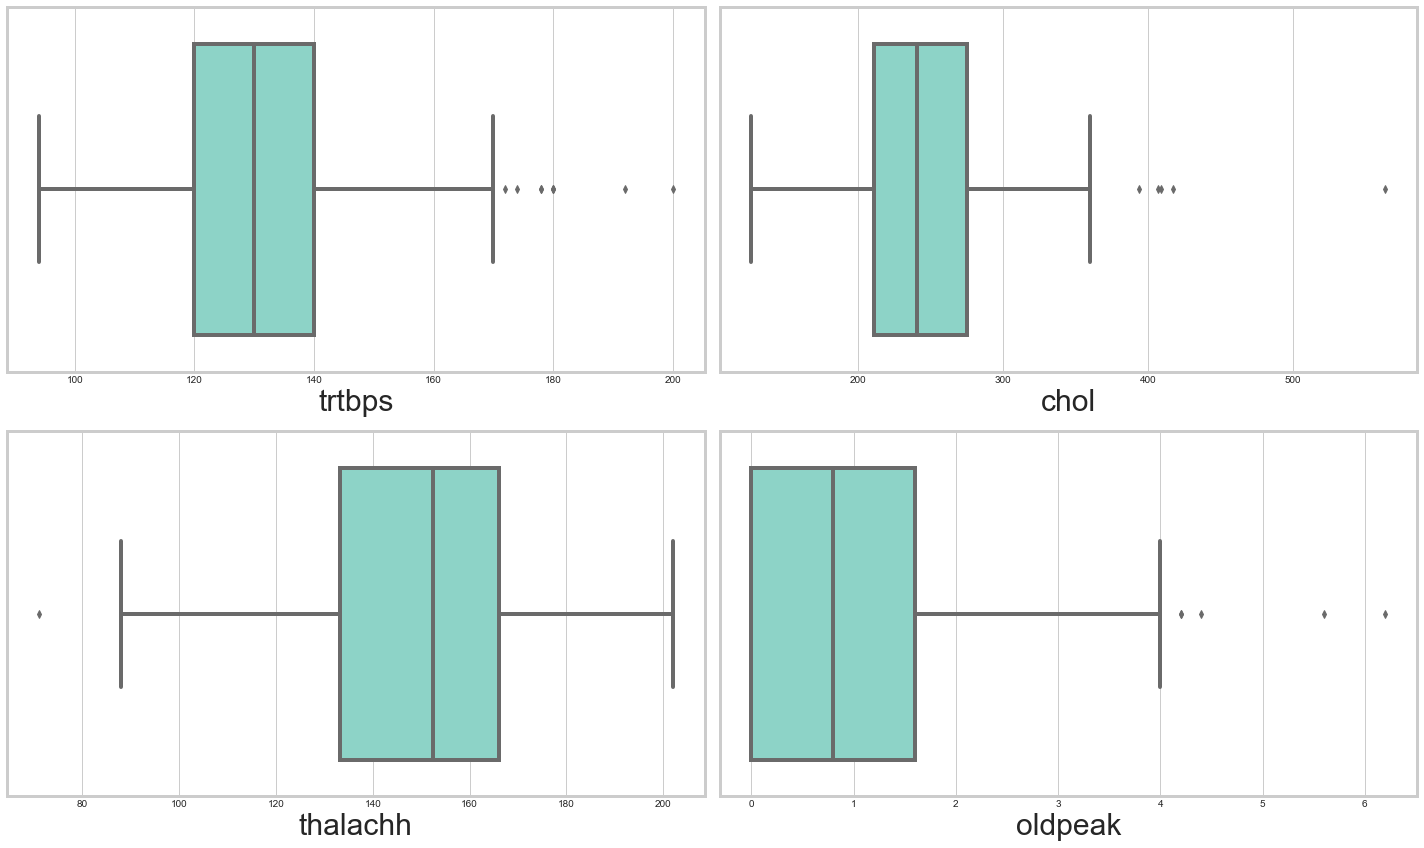

Outliners Present at position: 

trtbps: (array([  8, 101, 110, 152, 194, 202, 222, 227, 240, 247, 259, 265, 291],
      dtype=int64),)
chol: (array([ 28,  85,  96, 219, 245], dtype=int64),)
thalachh: (array([271], dtype=int64),)
oldpeak: (array([101, 203, 220, 249, 290], dtype=int64),)


In [18]:
fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
sns.set_style("whitegrid")
for i in range(2):
    for j in range(2):
        sns.boxplot(data=heart,x=heart[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j])
        k+=1
plt.tight_layout()
plt.rc('xtick', labelsize=10)
plt.rc('axes', labelsize=30)

plt.show()

#Display the position of outliners.
print("Outliners Present at position: \n")
print("trtbps: {}".format(np.where(heart['trtbps']>165)))
print("chol: {}".format(np.where(heart['chol']>360)))
print("thalachh: {}".format(np.where(heart['thalachh']<80)))
print("oldpeak: {}".format(np.where(heart['oldpeak']>4)))

In [ ]:
## data set label과 data로 분리 및 minmax scalar 정규화

In [9]:
#Data Splitting
X=heart.iloc[:,:13]
Y=heart["output"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [ ]:
## confusion matrix 및 test 정확도 뿌리는 함수 정의

In [10]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,2))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel2',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

In [12]:
##  logistic regression

Execution time of model: 0.01097 seconds



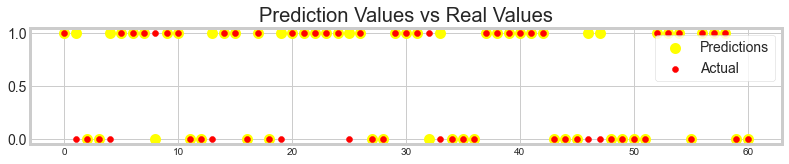

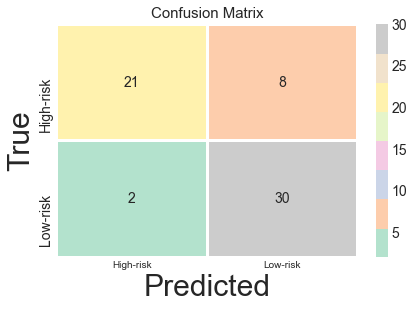

Precision: 0.789 
Recall: 0.938 
F1-Score: 0.857 
Accuracy: 83.607 %
Mean Square Error: 0.164


In [20]:
import time
#Build Model
start = time.time()

model_Log= LogisticRegression(random_state=10)
model_Log.fit(X_train,Y_train)
Y_pred= model_Log.predict(X_test)

end=time.time()

model_Log_time=end-start
model_Log_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_Log_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)

In [21]:
## KNN

Execution time of model: 0.00898 seconds


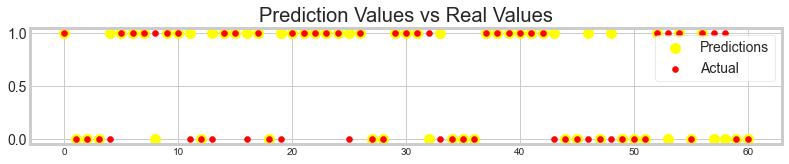

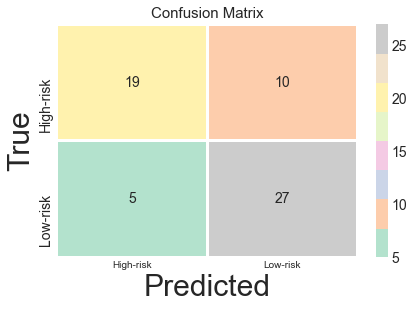

Precision: 0.73 
Recall: 0.844 
F1-Score: 0.783 
Accuracy: 75.41 %
Mean Square Error: 0.246


In [22]:
#Build Model
start=time.time()

model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)

end=time.time()

model_KNN_time = end-start
model_KNN_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_KNN_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

In [ ]:
## Knn neighbor 수 조절하면서 각각 k-fold로 정확두 구하기

0
1
2
3


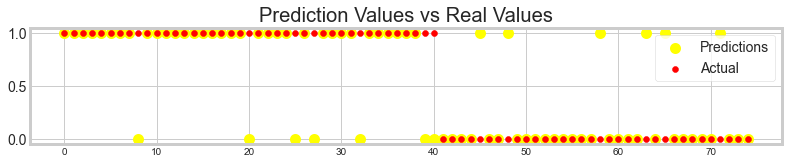

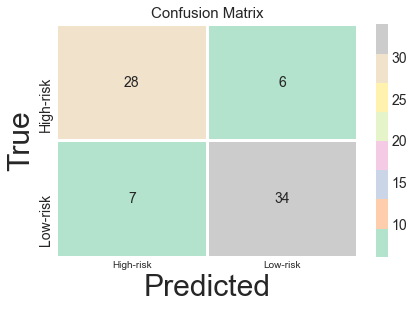

Precision: 0.85 
Recall: 0.829 
F1-Score: 0.84 
Accuracy: 82.667 %
Mean Square Error: 0.173
4
5
6
7


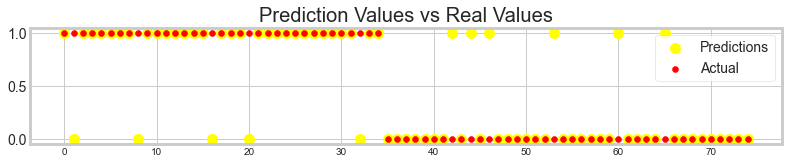

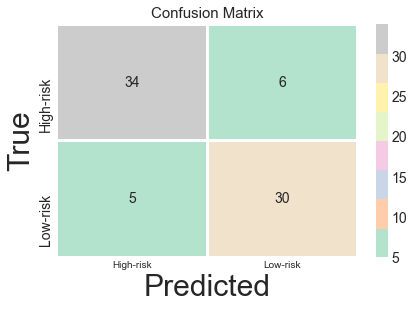

Precision: 0.833 
Recall: 0.857 
F1-Score: 0.845 
Accuracy: 85.333 %
Mean Square Error: 0.147
8
9
10
11


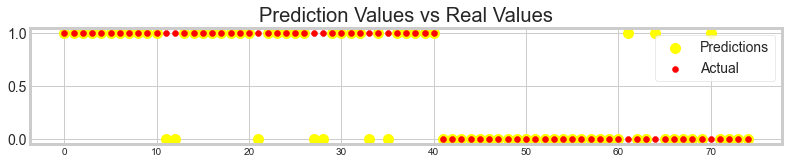

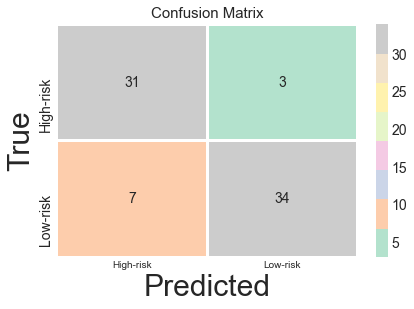

Precision: 0.919 
Recall: 0.829 
F1-Score: 0.872 
Accuracy: 86.667 %
Mean Square Error: 0.133


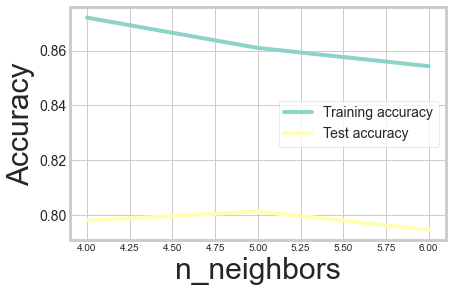

0.862412771431913
0.7980994152046783


In [25]:
from sklearn.model_selection import KFold

training_points = heart.iloc[:,:13]
labels = heart["output"]
features = np.array(training_points)
label = np.array(labels)

kfold = KFold(n_splits=4, shuffle=True)


# X_train, X_test, y_train, y_test = train_test_split(
#    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(4,7)
i=0
T_train_accuracy=[]
T_test_accuracy=[]

for n_neighbors in neighbors_settings:
    training_accuracy = []
    test_accuracy = []
#     y_train = MM_scaler.fit_transform(y_train)
#     y_test = MM_scaler.fit_transform(y_test)
    for train_index, test_index in kfold.split(features):
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)

        # 모델 생성
        print(i)
        i+=1

        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = label[train_index], label[test_index]
        
        MM_scaler = MinMaxScaler()
        X_train = MM_scaler.fit_transform(X_train)
        X_test = MM_scaler.fit_transform(X_test)
        clf.fit(X_train, y_train)
        # 훈련 세트 정확도 저장
        training_accuracy.append(clf.score(X_train, y_train))
        # 일반화 정확도 저장
        test_accuracy.append(clf.score(X_test, y_test))

    T_train_accuracy.append(np.mean(training_accuracy))
    T_test_accuracy.append(np.mean(test_accuracy))
    y_pred = clf.predict(X_test)
    compute(y_pred,y_test) 
plt.plot(neighbors_settings, T_train_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, T_test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


print(np.mean(T_train_accuracy))
print(np.mean(T_test_accuracy))

In [26]:
print((T_test_accuracy))

[0.7981140350877193, 0.8014035087719299, 0.794780701754386]


In [27]:
## SVM 모델 hyperparameter GridsearchCV로 구하기


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import sklearn.svm as svm
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=65) 
svm_clf = svm.SVC(kernel = 'rbf',random_state=100)
parameters =[{'kernel': ['rbf','poly'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_test, y_test)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,C,gamma,kernel,mean_test_score
11,100,0.0001,poly,0.768421
7,10,0.0001,poly,0.735673
17,10,NaN,linear,0.725731
16,1,NaN,linear,0.725731
19,1000,NaN,linear,0.725146
14,1000,0.0001,rbf,0.714620
18,100,NaN,linear,0.714620
3,1,0.0001,poly,0.702924
15,1000,0.0001,poly,0.702924
1,1,0.0010,poly,0.692398


In [ ]:
## 커널별 SVM 정확도

linear
0
1
2
3
[0.7763157894736842, 0.8026315789473685, 0.8947368421052632, 0.8666666666666667]


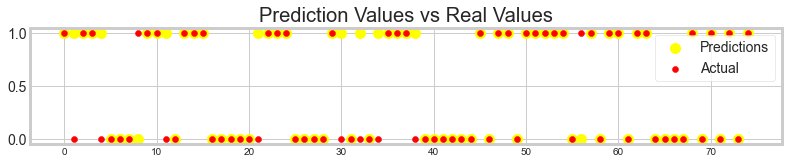

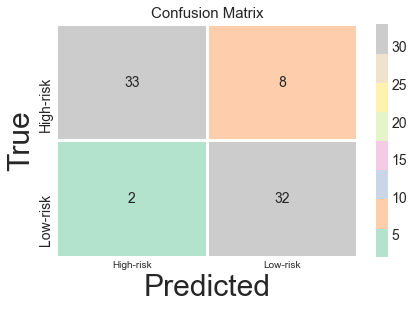

Precision: 0.8 
Recall: 0.941 
F1-Score: 0.865 
Accuracy: 86.667 %
Mean Square Error: 0.133
rbf
4
5
6
7
[0.7894736842105263, 0.881578947368421, 0.881578947368421, 0.88]


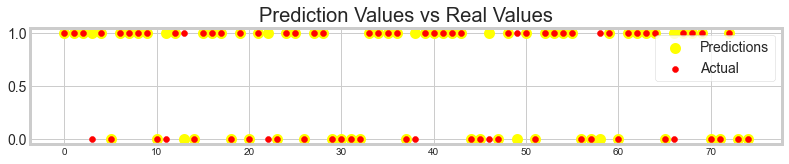

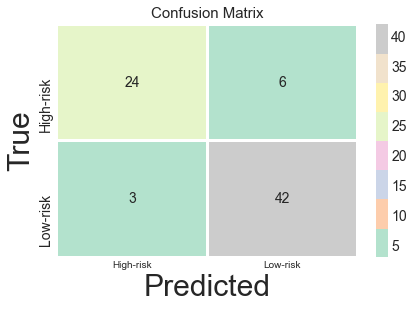

Precision: 0.875 
Recall: 0.933 
F1-Score: 0.903 
Accuracy: 88.0 %
Mean Square Error: 0.12
poly
8
9
10
11
[0.5131578947368421, 0.47368421052631576, 0.618421052631579, 0.5733333333333334]


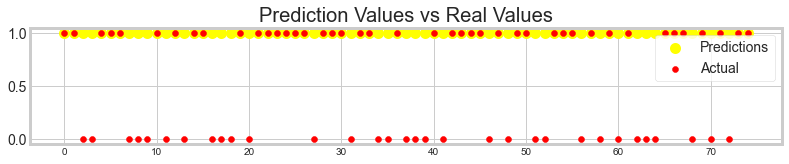

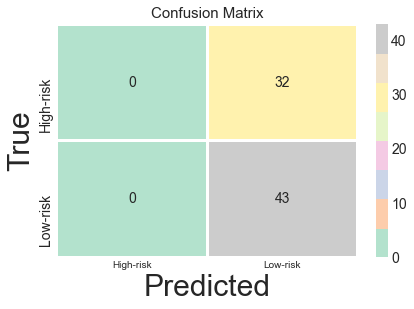

Precision: 0.573 
Recall: 1.0 
F1-Score: 0.729 
Accuracy: 57.333 %
Mean Square Error: 0.427


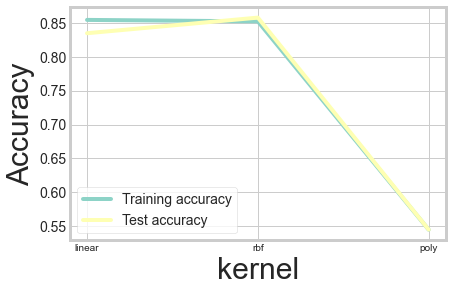

[0.5550660792951542, 0.5682819383259912, 0.5198237885462555, 0.5350877192982456]
[0.5131578947368421, 0.47368421052631576, 0.618421052631579, 0.5733333333333334]
0.5445648813664117
0.5446491228070176
0.7506504881881649
0.7459649122807018


In [29]:
from sklearn.model_selection import KFold
import random
heart=pd.read_csv('C:\\Users\\kwjin\\Desktop\\kwdoc\\대학원 수업\\2021-1학기\\데이터마이닝\\archive/heart.csv')
data=heart

df_shuffled=data.sample(frac=1).reset_index(drop=True)
training_points = df_shuffled.iloc[:,:13]
labels = df_shuffled["output"]


features = np.array(training_points)
label = np.array(labels)

kfold = KFold(n_splits=4, shuffle = True)

training_accuracy = []
test_accuracy = []
kernels= ("linear","rbf","poly")
i=0
T_train_accuracy=[]
T_test_accuracy=[]
total_tr=[]
total_te=[]

for kernel in kernels:

    training_accuracy = []
    test_accuracy = []
    print(kernel)
    for train_index, test_index in kfold.split(features):
        # 모델 생성
        print(i)
        i+=1
        clf = SVC(kernel=kernel, C=1000, gamma=0.001, random_state=64)
        
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = label[train_index], label[test_index]
        MM_scaler = MinMaxScaler()
        X_train = MM_scaler.fit_transform(X_train)
        X_test = MM_scaler.fit_transform(X_test)
        
        clf.fit(X_train, y_train)
        # 훈련 세트 정확도 저장
        training_accuracy.append(clf.score(X_train, y_train))
        # 일반화 정확도 저장
        test_accuracy.append(clf.score(X_test, y_test))
    print(test_accuracy)
    T_train_accuracy.append(np.mean(training_accuracy))
    T_test_accuracy.append(np.mean(test_accuracy))
    total_tr.append(training_accuracy)
    total_te.append(test_accuracy)
    y_pred = clf.predict(X_test)
    compute(y_pred,y_test) 
plt.plot(kernels, T_train_accuracy, label="Training accuracy")
plt.plot(kernels, T_test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("kernel")
plt.legend()
plt.show()
print(training_accuracy)
print(test_accuracy)
print(np.mean(training_accuracy)) 
print(np.mean(test_accuracy))

print(np.mean(T_train_accuracy))
print(np.mean(T_test_accuracy))

In [30]:
print(T_train_accuracy)
print(T_test_accuracy)

[0.8547849524692789, 0.8526016307288045, 0.5445648813664117]
[0.8350877192982457, 0.858157894736842, 0.5446491228070176]


In [32]:
## RANGDOMFOREST CLASSIFIER

In [33]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('classifier', LogisticRegression())])

param_grid = [{'classifier': [SVC()], 
              'classifier__gamma': [0.01, 0.1, 1, 10, 100], 
              'classifier__C': [0.01, 0.1, 1, 10, 100]
              },

               {'classifier': [LogisticRegression()],
               'classifier__penalty': ['l1', 'l2'], 
               'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
               },

              {'classifier': [RandomForestClassifier()],
              'classifier__max_depth': [4, 6], # max_depth: The maximum depth of the tree.
              'classifier__n_estimators': [50, 100], # n_estimators: The number of trees in the forest.
              'classifier__min_samples_split': [50, 100]
              }] # min_samples_split: The minimum number of samples required to split an internal node       

grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv=5)  
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'classifier': LogisticRegression(C=1), 'classifier__C': 1, 'classifier__penalty': 'l2'}
0.9136356421356421


In [34]:
print(X_train)

[[0.25       1.         0.         ... 1.         0.         1.        ]
 [0.52083333 0.         0.66666667 ... 1.         0.25       0.66666667]
 [0.625      1.         0.66666667 ... 1.         0.         0.66666667]
 ...
 [0.75       1.         0.         ... 1.         0.5        0.33333333]
 [0.79166667 1.         0.         ... 0.5        0.         0.66666667]
 [0.5625     0.         0.         ... 0.         0.5        1.        ]]
